In [44]:
companies=['NMB']

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.select import Select
import pprint
import pandas as pd
import pickle
import time  
import random

#DEFAULT OPTIONS
option = Options()
driver = webdriver.Chrome(options=option)

#FUNCTION FOR NEXT CLICK BASED UPON XPATH
def click_next(h):
    nextButton = driver.find_element_by_xpath(h)
    nextButton.click()

In [18]:
datas=[]

#ITERATION OVER LIST OF COMPANIES
for company_symbol in companies:
    url = 'https://www.sharesansar.com/company/{}'.format(company_symbol)
    driver.get(url)
    driver.execute_script("window.scrollTo(0, 1080)")
    a=driver.find_element_by_id("btn_companyprofile_pricehistory")
    a.click()
    
    time.sleep(2)
    driver.execute_script("window.scrollTo(0, 2080)")
    
    #first collect data from last page. And click on "previous" button until the first page is reached
    last_page='/html/body/div[1]/div/section[2]/div[3]/div/div[3]/div/div/div/div/div[1]/div[9]/div[2]/div/ul/li[12]/a'
    find=driver.find_element_by_xpath(last_page)
    find.click()
    total_pages=int(find.text)
    
    #xpath for previous page button
    previous_page='/html/body/div[1]/div/section[2]/div[3]/div/div[3]/div/div/div/div/div[1]/div[9]/div[2]/div/ul/li[1]/a'
    
    for n in range(total_pages-1):
        print('Company: {} Page Number: {}'.format(company_symbol,total_pages-n))
        time.sleep(4)
        selRows = driver.find_elements_by_xpath('/html/body/div[1]/div/section[2]/div[3]/div/div[3]/div/div/div/div/div[1]/div[9]/div[2]/div/table/tbody/tr')        
        for row in selRows[::-1]:
            datas.append(row.text.split(' '))
        click_next(previous_page)     
        time.sleep(4)
    #Last one(first page): remaining page
    selRows = driver.find_elements_by_xpath('/html/body/div[1]/div/section[2]/div[3]/div/div[3]/div/div/div/div/div[1]/div[9]/div[2]/div/table/tbody/tr')        
    for row in selRows[::-1]:
        datas.append(row.text.split(' '))
    
    #Convert and save as csv file
    df=pd.DataFrame(datas,columns=['S.No','Date','Open','High','Low','LTP','% Change','Qty','Turnover'])
    del df['S.No']   
    df.to_csv("{}.csv".format(company_symbol), sep=',',index=False) #convert to csv file
    
    datas=[] #for next company

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53


In [23]:
df=pd.DataFrame(datas,columns=['S.No','Date','Open','High','Low','LTP','% Change','Qty','Turnover'])

#print(datas)
del df['S.No']
df.to_csv("nmb.csv", sep=',',index=False) #convert to csv file

In [24]:
df.tail()

,Date,Open,High,Low,LTP,% Change,Qty,Turnover
1639,2019-12-22,332,332,322,326,-18.91,"102,132","33,366,462"
1640,2019-12-23,325,327,324,327,0.31,"98,291","31,976,185"
1641,2019-12-24,328,330,325,325,-0.61,"56,332","18,440,353"
1642,2019-12-25,330,330,323,324,-0.31,"30,314","9,864,852"
1643,2019-12-26,329,329,323,325,0.31,"41,536","13,457,767"


In [26]:
df.head()

,Date,Open,High,Low,LTP,% Change,Qty,Turnover
0,2011-03-20,251,251,247,250,0,599,"148,965"
1,2011-03-24,260,255,254,254,0,344,"87,406"
2,2011-03-25,254,249,249,249,0,88,"21,912"
3,2011-03-27,249,245,245,245,0,636,"155,820"
4,2011-03-28,245,244,226,228,0,"1,951","458,706"


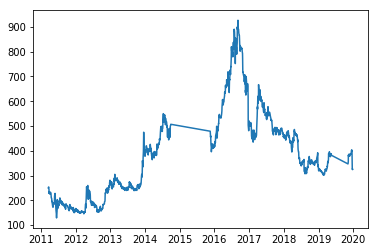

In [43]:
import matplotlib.pyplot as plt
df2=df.astype({'Date': 'datetime64[ns]','LTP':'float64'})
plt.plot(df2['Date'],df2['LTP'])